# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous le nom, le prénom et le numéro étudiant de chaque membre du binôme :
</div>

In [26]:
# Vu Hoang Thuy Duong - 21110221 SCFO

# Clustering : k-moyennes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1 - Données fruitées

<div class="alert alert-block alert-warning">
Pour illustrer le fonctionnement de l'algorithme des K-moyennes, nous allons utiliser un jeu de données très simple contenu dans <code>fruits.csv</code>. Il décrit le poids, la hauteur et la largeur d'un ensemble de pommes, mandarines, oranges et citrons.
</div>
    
<div class="alert alert-block alert-info">
Q1.1 - Charger ce jeu de données dans la variable <code>fruits</code> et visualiser ses premières lignes.
</div>

In [3]:
fruits = pd.read_csv("fruits.csv")

<div class="alert alert-block alert-info">
Q1.2 - Isoler dans un tableau <code>numpy</code> que vous nommerez <code>fruits_class</code> la classe de chaque fruit (de 1 à 4) et dans un autre tableau <code>fruits_mw</code> le poids et la largeur de chaque fruit. N'oubliez pas d'utiliser la fonction <code>to_numpy()</code> qui permet de convertir une dataframe en tableau numpy.
</div>

In [9]:
fruits_class = fruits["fruit_label"].to_numpy()
fruits_mw = fruits[["mass","width"]].to_numpy()

<div class="alert alert-block alert-info">
Q1.3 - Tracer avec un scatter plot le jeu de données en 2D à partir du tableau <code>fruits_mw</code> en coloriant différement chaque type de fruit.
</div>

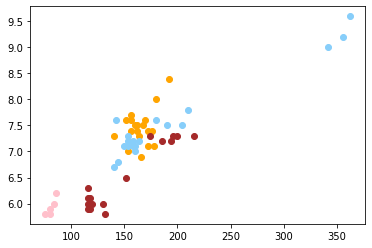

In [15]:
c = ["orange","pink","lightskyblue","brown"]
for i in range(len(fruits)):
    plt.scatter(fruits_mw[i][0],fruits_mw[i][1],color=c[fruits_class[i]-1])

## 2 - Algorithme des K-moyennes : préliminaires

<div class="alert alert-block alert-warning">
Deux étapes constituent l'algorithme des K-moyennes : 
<ul>
<li> étant donnés un jeu de données <code>data</code> sous la forme d'un tableau numpy (un exemple par ligne, une dimension par colonne) et un ensemble de centroïdes sous la forme d'un tableau numpy (un centroide par ligne, une dimension par colonne), il faut calculer l'affectation de chaque exemple au centroïde le plus proche. Cette opération sera effectuée par la fonction <code>calcul_affectation(data, centroides)</code> qui retournera un vecteur numpy contenant pour chaque case l'affectation de l'exemple concerné ;</li>
<li> étant donnés un jeu de données <code>data</code>, une affectation <code>affectation</code> et un entier <code>k</code>, il faut calculer les barycentres des exemples de chacun des $k$ clusters. Si jamais un cluster est vide (aucun exemple n'a cette affactation), alors un exemple au hasard est tiré  comme nouveau centroïde. </li>
</div>

<div class="alert alert-block alert-info">
Exécuter les lignes ci-dessous qui permettent d'engendrer 10 centroïdes en tirant au hasard dans les données.
</div>

In [16]:
np.random.seed(0)
centroides = np.zeros((10, fruits_mw.shape[1]))
for i in range(10):
    centroides[i] = fruits_mw[np.random.randint(len(fruits_mw))]

<div class="alert alert-block alert-info">
Q2.1 - Donner la ligne qui permet de calculer la distance au carré entre la première ligne de <code>fruits_mw</code> et tous les centroïdes. Pour cela, il faut d'abord soustraite la première ligne à la matrice des centroïdes, puis élever tous les termes au carré, et ensuite sommer toutes les lignes (à l'aide des opérations <code>np.sum(matrice, axis = 1)</code>. On stockera le résultat dans la variable <code>distance</code>.
</div>

In [18]:
distance = np.sum((fruits_mw[0] - centroides)**2, axis = 1)
distance

array([   65.21,    17.21,  5189.76,     0.  , 11240.84, 11240.84,
        2306.56,   401.  ,   901.  ,  1297.  ])

<div class="alert alert-block alert-warning">
Il faut trouver :
<code>
array([   65.21,    17.21,  5189.76,     0.  , 11240.84, 11240.84, 2306.56,   401.  ,   901.  ,  1297.  ])
</code>
</div>

<div class="alert alert-block alert-info">
Q2.2 - Utiliser <code>np.argmin</code> pour trouver le centroïde le plus proche de la première ligne à partir du résultat précédent. On le stockera dans la variable <code>idx</code>.
</div>

In [20]:
idx = np.argmin(distance)
idx

3

<div class="alert alert-block alert-warning">
Il faut trouver :
<code>
3
</code>
</div>

<div class="alert alert-block alert-info">
Exécuter le block suivant qui permet de créer un vecteur d'affectation aléatoire entre 10 clusters pour les exemples du jeu de données. 
</div>

In [21]:
np.random.seed(0)
affectation = np.random.randint(0, 10, len(fruits_mw))
affectation

array([5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, 6, 7, 7, 8, 1, 5, 9,
       8, 9, 4, 3, 0, 3, 5, 0, 2, 3, 8, 1, 3, 3, 3, 7, 0, 1, 9, 9, 0, 4,
       7, 3, 2, 7, 2, 0, 0, 4, 5, 5, 6, 8, 4, 1, 4])

<div class="alert alert-block alert-info">
Q2.3 - Donner la ligne qui permet de calculer  le barycentre des exemples affecté au cluster $0$. Utiliser <code>np.mean(matrice, axis = 0)</code> pour faire la moyenne selon les colonnes.
</div>

In [25]:
barycentre = np.mean(fruits_mw[affectation==0],axis=0)
barycentre

array([182.28571429,   7.25714286])

<div class="alert alert-block alert-warning">
Il faut trouver :
<code>
array([182.28571429,   7.25714286])
</code>
</div>

## Algorithme K-moyennes : fonctions de l'algorithme

<div class="alert alert-block alert-info">
Q3.1 - Compléter la fonction suivante qui calcule l'affectation en utilisant ce que vous avez fait précédement.
</div>

In [30]:
def calcul_affectation(data,centroides):
    # Création du vecteur d'affectation 
    affectation = np.zeros(len(data))
    # On parcourt tous les exemples
    for i in range(len(data)):
        ## Compléter ici pour trouver le centroide le plus proche du i-ème exemple
        affectation[i] = np.sum((fruits_mw[i] - centroides)**2, axis = 1).argmin()
        
    return affectation

<div class="alert alert-block alert-info">
Q3.2 - Compléter la fonction suivante qui calcule le barycentre en utilisant ce que vous avez fait précédement.
</div>

In [31]:
def calcul_barycentres(data, affectation, k):
    # Création de la matrice des centroides
    centroides = np.zeros((k, data.shape[1]))
    # On parcourt tous les clusters
    for i in range(k):
        # On vérifie que le cluster n'est pas vide
        if len(data[affectation == i]) > 0:
            ## Compléter ici pour calculer le barycentre du cluster i
            
            centroides[i,:] = np.mean(data[affectation == i], axis = 0)
                     
        else:
            # si le cluster est vide on tire un exemple au hasard
            centroides[i, :] = data[np.random.randint(len(data))]
    return centroides

<div class="alert alert-block alert-info">
Exécuter le block ci-dessous qui contient deux versions de la fonction qui calcule la dispersion intra-cluster.
</div>

In [32]:
def dispersion_intra(data,affectation,centroides):
    # initialisation de la dispersion à 0
    d = 0.
    # on parcourt tous les clusters
    for i in range(len(centroides)):
        d += ((data[affectation==i] - centroides[i]) ** 2).sum()
    return d

# Autre version plus compacte
def dispersion_intra(data,affectation,centroides):
    return np.sum([((data[affectation==i] - centroides[i]) ** 2).sum() for i in range(len(centroides))])

<div class="alert alert-block alert-info">
Exécuter le block ci-dessous qui définit la fonction principale qui calcule les K-moyennes pour des données <code>data</code>, un nombre <code>k</code> de clusters et un nombre maximal de <code>niter</code> itérations. Si la dispersion entre deux itérations ne change pas, la boucle est interrompue. La fonction retourne le vecteur d'affectation et les centroïdes.
</div>

In [33]:
def kmeans(data,k,niter=200):
    ## Initialisation des centroides
    centroides = np.zeros((k, data.shape[1]))
    dispersion = -1
    for i in range(k):
        centroides[i] = data[np.random.randint(len(data))]
    ## Boucle principale
    for i in range(niter):
        affectation = calcul_affectation(data, centroides)
        centroides = calcul_barycentres(data, affectation, k)
        old_dispersion = dispersion
        dispersion = dispersion_intra(data, affectation, centroides)
        if (old_dispersion == dispersion): 
            break
        print(i, dispersion)
    return affectation, centroides

<div class="alert alert-block alert-info">
Q3.3 - Tester l'algorithme sur le jeu de données avec $k=5$.
</div>

In [34]:
kmeansReturnAffectation, kmeansReturnCentoides = kmeans(fruits_mw, 5)
kmeansReturnCentoides

0 63349.17681253713
1 31649.882214285713
2 7640.854883645767
3 7308.432726045884
4 7223.817667832168


array([[195.27272727,   7.55454545],
       [164.6       ,   7.315     ],
       [146.        ,   6.92307692],
       [353.33333333,   9.26666667],
       [102.16666667,   6.        ]])

<div class="alert alert-block alert-info">
Q3.4 - Tracer un scatter plot en coloriant les clusters. Tracer également les centroïdes.
</div>

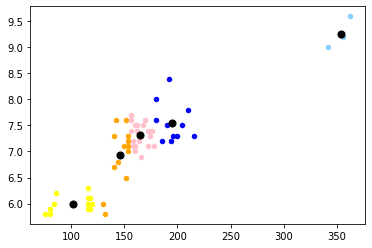

In [40]:
colors = ["pink", "orange", "lightskyblue", "yellow", "blue"]

for i in range(len(fruits_mw)):
    
    plt.scatter(fruits_mw[i][0], fruits_mw[i][1], c=colors[int(kmeansReturnAffectation[i]) - 1],s=20)

for j in range(len(kmeansReturnCentoides)):
    
    plt.scatter(kmeansReturnCentoides[j][0], kmeansReturnCentoides[j][1], c="black", s=50.0)

<div class="alert alert-block alert-info">
Q3.5 - Refaire le même graphique pour différentes valeurs de $k$ (2,3,10 par exemple). Que remarquez vous pour la dispersion intra-cluster lorsque $k$ augmente ?
</div>

In [55]:
def plotKMeans(data, k):
    
    kmeansReturnAffectation, kmeansReturnCentoides = kmeans(data, k)
    
    colors = ["green", "red", "orange", "yellow", "pink", "lightskyblue", "purple", "magenta", "cyan", "#c78fc3"]

    for i in range(len(fruits_mw)):

        plt.scatter(fruits_mw[i][0], fruits_mw[i][1], c=colors[int(kmeansReturnAffectation[i]) - 1],s=20)

    for j in range(len(kmeansReturnCentoides)):

        plt.scatter(kmeansReturnCentoides[j][0], kmeansReturnCentoides[j][1], c="black", s=50.0)
    plt.title("FIGURE")

0 116297.7662857143
1 114044.36140056021
2 113378.31387533873


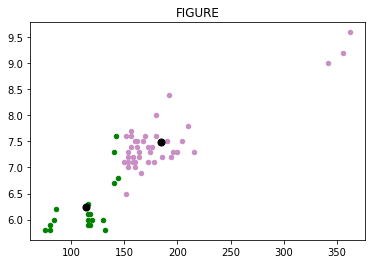

In [56]:
plotKMeans(fruits_mw,2)

0 86459.46546031746
1 63995.39133116882
2 50336.241165413536
3 20605.14


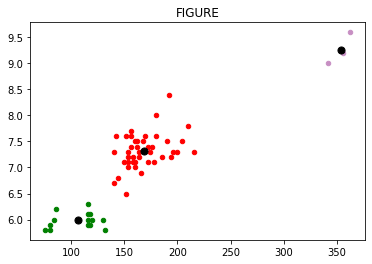

In [57]:
plotKMeans(fruits_mw,3)

0 3831.8235873015874
1 1042.8791746031748
2 946.5035580808081
3 828.2601666666666
4 761.0037023809524


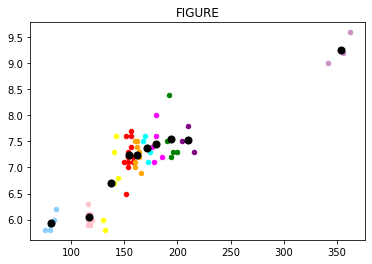

In [58]:
plotKMeans(fruits_mw,10)

## 4 - Pureté des cluster
<div class="alert alert-block alert-warning">
Dans notre cas de figure, on dispose d'une supervision : on connait la vraie classe des fruits. On peut évaluer la pertinence de notre clustering grâce à cette information de plusieurs manières. Par exemple, la pureté d'un clustering consiste à regarder dans chaque cluster le nombre d'exemples bien classés, i.e. qui ont la même classe que la classe assignée à ce cluster (la classe majoritaire), à sommer sur la totalité de cluster ces nombres et à divisier par le nombre d'exemples, ce qui nous donne le pourcentage d'exemples bien classés. La fonction ci-dessous implémente ce calcul.
</div>

<div class="alert alert-block alert-info">
Exécuter le block ci-dessous qui définit la fonction qui implémente ce calcul.
</div>

In [59]:
def purete(labels,affectation):
    clusters = np.unique(affectation)
    list_labels = np.unique(labels)    
    res = np.zeros((len(clusters), len(list_labels)))
    for i in range(len(clusters)):
        for j in range(len(list_labels)):
            res[i,j] = (affectation[labels == j] == clusters[i]).sum()
    correct = np.max(res, axis = 1)
    return correct.sum() / len(labels)

<div class="alert alert-block alert-info">
Q4.1 - Tracer les courbes de la pureté et de la dispersion en fonction de $k$. Pour chaque valeur de $k$, on exécutera la fonction <code>kmeans</code> et on ajoutera la dispersion dans une liste <code>disp_k</code> ainsi que la pureté dans une liste <code>pure_k</code>. Analyser les résultats.
</div>

---